<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Jesús Sebastián González Ortiz y Mateo Vera Dorantes.

**Fecha:** 10 de octubre del 2021.

**Expediente** : 721621 y 709396.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/SebasGlez2000/Tarea6_JSGonzalez_MVDorantes

# Tarea 6: Clase 10

In [1]:
from scipy import optimize
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
import math
import scipy.special as sps 
from math import factorial as fac

## Enunciado de tarea (Transcibirlo)
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:


### Ejercicio 1: (enunciado) Transcribirlo

1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

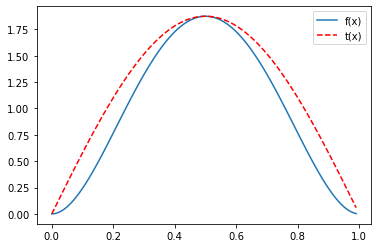

In [2]:
# Código de solución estudiante 1
func = lambda x: 30*((x**2)-2*(x**3)+(x**4))
func_opt = func(optimize.fmin(lambda x:-func(x), 0, disp=False))

fx = np.arange(0,1,0.01) 
tx = lambda x: func_opt * np.sin(np.pi*x)

plt.plot(fx, func(fx), label="f(x)")
plt.plot(fx, tx(fx), "r--", label="t(x)")
plt.legend(loc = "best")
plt.show()

Código de solución estudiante 2

In [3]:
# Código de solución estudiante 2
f = lambda x:30*(x**2-2*x**3+x**4) #funcion

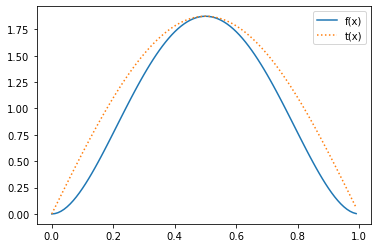

In [4]:
maxf = f(optimize.fmin(lambda x:-f(x),0,disp=False)) #sacamos maximo y t
t = lambda x: maxf*np.sin(np.pi*x)
x = np.arange(0,1,0.01)  
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),":",label='t(x)')
plt.legend(loc="best")
plt.show()

Definimos la función de densidad dada y después se optimiza con las condiciones que hay para posteriormente graficarlas y observar como se comportaron los datos.

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

Integramos tx de 0 a 1

$ t(x) = a \cdot \sin(\pi x) $

$ c= \int_{0}^{1} a \cdot \sin(\pi x) dx = a \int_{0}^{1} \sin(\pi x) dx = \frac{a}{\pi} (-\cos(\pi x)) \Big|_{0}^{1} = \frac{a}{\pi} (1 - (-1)) = \frac{2a}{\pi}$

Nuestro resultado es:

$g(x) = \frac{t(x)}{c} = \frac{a \pi \sin(\pi x)}{2 a} =  \frac{\pi \sin(\pi x)}{2}$

3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

$G(x) = \int g(x)dx $
 
$ G(x) =  \int_{0}^{x} \frac{ \pi \sin(\pi x)}{2} dx$

$ u = \frac{1}{2}(- \cos(\pi x)+1) $

$ 2u = (- \cos(\pi x)+1) $

$ 2u-1 = - \cos(\pi x) $

$ \cos^{-1}(-2u+1) = \pi x$

$x= \frac{\cos^{-1}(-2u+1)}{\pi}$

4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. 

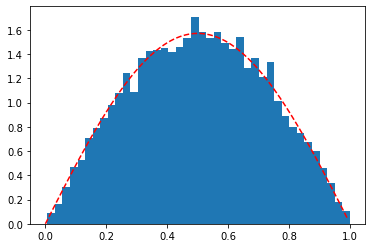

In [5]:
# Estudiante 1
def ej(fx,inversa,N): #Definimos la función
    u = np.random.uniform(0,1,N)
    x = np.arange(0,1,.01)
    funcion = inversa(u)
    fx = fx(x)
    plt.plot(x,fx,'r--')
    plt.hist(funcion, bins=40, density=True)
    plt.show()

N=10000
g_x = lambda x: (np.pi*np.sin(np.pi*x))/2
equis = lambda u: (np.arccos(-2*u+1))/np.pi
ej(g_x,equis,N)

In [6]:
# Estudiante 2
def ej(fx,inversa,N): #Definimos la función
    u = np.random.uniform(0,1,N)
    x = np.arange(0,1,.01)
    funcion = inversa(u)
    fx = fx(x)
    plt.plot(x,fx,'r--')
    plt.hist(funcion, bins=40, density=True)
    plt.show()

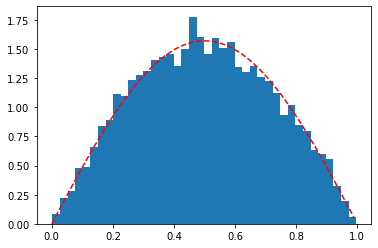

In [7]:
N=10000
g_x = lambda x: (np.pi*np.sin(np.pi*x))/2
equis = lambda u: (np.arccos(-2*u+1))/np.pi
ej(g_x,equis,N)

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados.

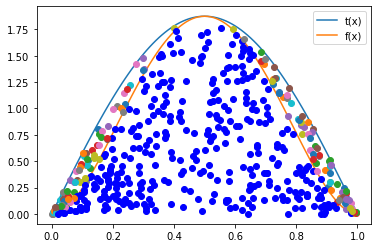

In [8]:
# Estudiante 1
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()
    return

N = 500 
x = np.arange(0,1,0.01)

R2 = np.random.rand(N)
R1 = np.random.rand(N)

plt.plot(x,t(x),label='t(x)')
plt.plot(x,f(x),label='f(x)')
plt.legend()
graf = Acep_rechazo(R2,R1,f,t)

plt.show(graf)

In [9]:
# Estudiante 2
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()

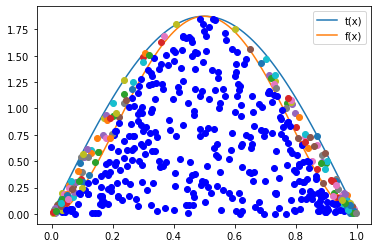

In [10]:
N = 500 
x = np.arange(0,1,0.01)

R2 = np.random.rand(N)
R1 = np.random.rand(N)

plt.plot(x,t(x),label='t(x)')
plt.plot(x,f(x),label='f(x)')
plt.legend()
graf = Acep_rechazo(R2,R1,f,t)

plt.show(graf)

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

In [11]:
# Estudiante 1
def Acep_rechazo_Sen(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = np.multiply(R2,t_x)<=f_x
    c = np.asarray([1 if condition[i] else 0 for i in range(len(R1))]).sum()
    return c

r_sen=(Acep_rechazo_Sen(R2,R1,f,t)/len(R1))*100
print('El porcentaje de aceptacion senoidal es del',r_sen,'%')

El porcentaje de aceptacion senoidal es del 66.60000000000001 %


In [12]:
# Estudiante 2
def Acep_rechazo_Sen(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    c=np.zeros(len(R1))
    condition = np.multiply(R2,t_x)<=f_x
    c = np.asarray([1 if condition[i] else 0 for i in range(len(R1))]).sum()
    return c

In [13]:
r_sen=(Acep_rechazo_Sen(R2,R1,f,t)/len(R1))*100
print('El porcentaje de aceptacion senoidal es del',r_sen,'%')

El porcentaje de aceptacion senoidal es del 66.60000000000001 %


7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

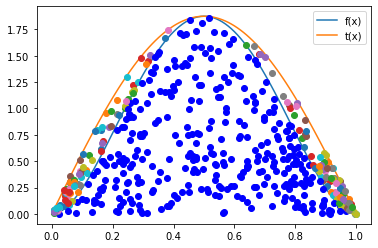

In [14]:
# Estudiante 1

sim = 500

func = lambda x: 20 * x * ((1-x)**3)
f_opt = func(optimize.fmin(lambda x:-func(x), 0, disp=False))

x = np.arange(0, 1, .01)
R1 = np.random.rand(sim)
R2 = np.random.rand(sim)

plt.plot(x,f(x),label="f(x)")
plt.plot(x,t(x),label="t(x)")
plt.legend()

Acep_rechazo(R2,R1,f,t)

In [15]:
# Estudiante 2
f = lambda x:20*x*(1-x)**3 #funcion

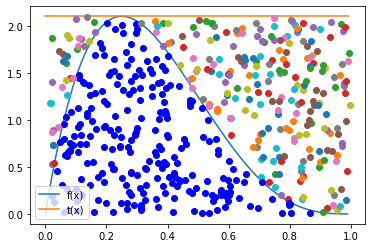

In [16]:
N = 500
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
t = lambda x: max_f*np.ones(len(x))
x = np.arange(0,1,0.01)

R2 = np.random.rand(N)
R1 = np.random.rand(N)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

Acep_rechazo(R2,R1,f,t)

8. Demostrar la validez de la siguiente ecuación
$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i$$

Se definen las propiedades de los factoriales:

$$n!=n(1+n)!$$ 

$$\frac{n!}{(n+1)!}=\frac{1}{n+1}$$

Proceso:

$$ \frac{p_{i+1}}{p_i}=\frac{\frac{n! p ^ {i+1} (1-p)^{n-i+1}}{(i+1)!(n-i+1)!}}{\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}}$$

$$\frac{p_{i+1}}{p_i} = \frac{n!p^ip(1-p)^ni!(n-i)!(1-p)^i}{(1-p)^i(1-p)(i+1)!(n-i-1)!n!p^i(1-p)^n}$$$$\frac{p_{i+1}}{p_i} = \frac{pp^i(1-p)^ni!(n-i)!(1-p)^i}{(1-p)^i(1-p)(i+1)!(n-i-1)!p^i(1-p)^n} = \frac{pi!(n-i)!(1-p)^i}{(1-p)^i(1-p)(i+1)!(n-i-1)!}=\frac{pi!(n-i)!}{(1-p)(i+1)!(n-i-1)!}$$
$$\frac{p_{i+1}}{p_i} = \frac{pi!(n-i)!}{(1-p)i!(i+1)(n-i-1)!} = \frac{p(n-i)!}{(1-p)(i+1)(n-i-1)!}$$$$\frac{p_{i+1}}{p_i} = \frac{p(n-i)}{(1-p)(i+1)} = \frac{n-i}{i+1}\frac{p}{1-p}$$$$p_{i+1} = \frac{n-i}{i+1}\frac{p}{1-p}p_i$$

9. Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    

Demuestre matemáticamente que 
 $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
 y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Se definen las propiedades de los factoriales:

$$k!=k(1+k)!$$

$$\frac{k!}{(k+1)!}=\frac{1}{k+1}$$

Proceso:

$$\frac{P(k+1)}{P(k)} = \frac{\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!}}{\frac{e^{-\lambda}(\lambda)^k}{k!}}$$

$$\frac{P(k+1)}{P(k)} = \frac{e^{-\lambda}\lambda^{k+1} k!}{(k+1)!e^{-\lambda}\lambda^k} = \frac{e^{-\lambda}\lambda^{k}\lambda k!}{(k+1)!e^{-\lambda}\lambda^k}$$$$\frac{P(k+1)}{P(k)} = \frac{\lambda k!}{(k+1)!}$$$$\frac{P(k+1)}{P(k)} = \frac{k!}{(k+1)!} * \frac{\lambda}{1}$$$$\frac{P(k+1)}{P(k)} = \frac{k!}{(k+1)!} * \frac{\lambda}{1} = \frac{1}{(k+1)} * \frac{\lambda}{1}=\frac{\lambda}{(k+1)}$$$$P(k+1) = \frac{\lambda}{(k+1)}P(k)$$

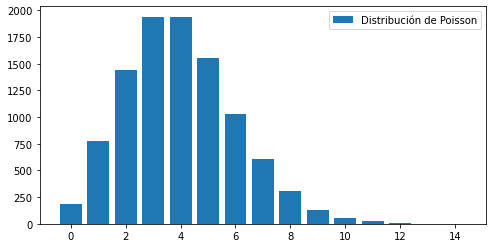

In [17]:
# Estudiante 1

sim = 10000
lam = 4

def Poisson(lam, sim): 
    vec = np.zeros(sim)
    vec[0] = np.exp(-lam)
    
    def vector(i):
        nonlocal vec
        vec[i+1] = (lam*vec[i])/(i+1) 
    [vector(i) for i in range(sim-1)]
    return vec.cumsum()

def dd(probacum, sim):
    x = np.random.rand(sim)
    dd = [sum([1 for p in probacum if p < i ])  for i in x]
    return dd

probacum = Poisson(lam, sim) 
distr = dd(probacum, sim) 

plt.figure(figsize=[8,4])
y, x = np.histogram(distr,bins = len(set(distr))) 
plt.bar(list(set(distr)), y, label="Distribución de Poisson")
plt.legend()
plt.show()

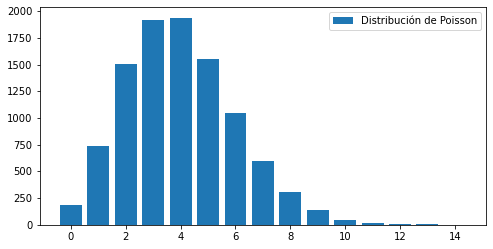

In [18]:
# Estudiante 2

sim = 10000
lam = 4

def Poisson(lam, sim): 
    vec = np.zeros(sim)
    vec[0] = np.exp(-lam)
    
    def vector(i):
        nonlocal vec
        vec[i+1] = (lam*vec[i])/(i+1) 
    [vector(i) for i in range(sim-1)]
    return vec.cumsum()

def dd(probacum, sim):
    x = np.random.rand(sim)
    dd = [sum([1 for p in probacum if p < i ])  for i in x]
    return dd

probacum = Poisson(lam, sim) 
distr = dd(probacum, sim) 

plt.figure(figsize=[8,4])
y, x = np.histogram(distr,bins = len(set(distr))) 
plt.bar(list(set(distr)), y, label= "Distribución de Poisson")
plt.legend()
plt.show()